In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv("All_Pokemon.csv")

In [3]:
df

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,896,Glastrier,Ice,NaN,['Chilling Neigh'],100,145,130,65,110,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3
1028,897,Spectrier,Ghost,NaN,['Grim Neigh'],100,65,60,145,80,...,0.5,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5,11.1
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,...,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7,6.4
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   Name                     1032 non-null   object 
 2   Type 1                   1032 non-null   object 
 3   Type 2                   548 non-null    object 
 4   Abilities                1032 non-null   object 
 5   HP                       1032 non-null   int64  
 6   Att                      1032 non-null   int64  
 7   Def                      1032 non-null   int64  
 8   Spa                      1032 non-null   int64  
 9   Spd                      1032 non-null   int64  
 10  Spe                      1032 non-null   int64  
 11  BST                      1032 non-null   int64  
 12  Mean                     1032 non-null   float64
 13  Standard Deviation       1032 non-null   float64
 14  Generation              

In [5]:
df.shape

(1032, 44)

In [6]:
df.describe()

,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,...,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,439.226744,69.906008,80.526163,74.609496,72.918605,72.139535,68.548450,438.648256,73.108043,20.028104,...,1.002180,1.239826,1.025678,0.974806,1.074855,0.992006,1.094234,1.286822,71.879845,136.735756
std,261.871350,26.189155,32.542374,30.905972,32.773495,27.625876,30.219526,120.675545,20.112591,10.830298,...,0.613111,0.699361,0.577269,0.378040,0.475292,0.511859,0.535159,1.391501,132.872741,3111.666658
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,29.166667,0.000000,...,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,0.100000,0.100000,0.000000
25%,211.750000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,55.000000,12.801910,...,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.600000,9.000000,18.600000
50%,434.500000,67.000000,78.000000,70.000000,65.000000,70.000000,65.000000,459.000000,76.500000,18.484228,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.750000,28.350000
75%,667.250000,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,85.833333,24.835709,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000,71.275000,42.200000
max,898.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,130.000000,103.215659,...,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,20.000000,999.900000,99990.000000


In [7]:
df.nunique()

Number                      898
Name                       1032
Type 1                       18
Type 2                       18
Abilities                   602
HP                          103
Att                         123
Def                         113
Spa                         119
Spd                         106
Spe                         127
BST                         215
Mean                        215
Standard Deviation          725
Generation                    8
Experience type               6
Experience to level 100       6
Final Evolution               2
Catch Rate                   34
Legendary                     2
Mega Evolution                2
Alolan Form                   2
Galarian Form                 2
Against Normal                4
Against Fire                  5
Against Water                 5
Against Electric              6
Against Grass                 5
Against Ice                   5
Against Fighting              6
Against Poison                6
Against 

In [8]:
df.isnull().sum()

Number                       0
Name                         0
Type 1                       0
Type 2                     484
Abilities                    0
HP                           0
Att                          0
Def                          0
Spa                          0
Spd                          0
Spe                          0
BST                          0
Mean                         0
Standard Deviation           0
Generation                   0
Experience type              0
Experience to level 100      0
Final Evolution              0
Catch Rate                   0
Legendary                    0
Mega Evolution               0
Alolan Form                  0
Galarian Form                0
Against Normal               0
Against Fire                 0
Against Water                0
Against Electric             0
Against Grass                0
Against Ice                  0
Against Fighting             0
Against Poison               0
Against Ground               0
Against 

In [9]:
abilities = df["Abilities"].apply(eval).apply(pd.Series)
abilities.rename(columns={0:"Ability1", 1:"Ability2", 2:"Ability3"}, inplace=True)
df.drop(["Abilities"], axis=1, inplace=True)

for i in sorted(abilities.columns, reverse=True):
    df.insert(4, i, abilities[i])

df

,Number,Name,Type 1,Type 2,Ability1,Ability2,Ability3,HP,Att,Def,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,Chlorophyll,Overgrow,NaN,45,49,49,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,Chlorophyll,Overgrow,NaN,60,62,63,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,Chlorophyll,Overgrow,NaN,80,82,83,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,Thick Fat,NaN,NaN,80,100,123,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,Blaze,Solar Power,NaN,39,52,43,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,896,Glastrier,Ice,NaN,Chilling Neigh,NaN,NaN,100,145,130,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3
1028,897,Spectrier,Ghost,NaN,Grim Neigh,NaN,NaN,100,65,60,...,0.5,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5,11.1
1029,898,Calyrex,Psychic,Grass,Unnerve,NaN,NaN,100,80,80,...,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7,6.4
1030,898,Calyrex Ice Rider,Psychic,Ice,As One,NaN,NaN,100,165,150,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5


In [10]:
corr_matrix = df.select_dtypes(exclude=["object"]).corr()
corr_matrix

,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
Number,1.000000,0.108518,0.123581,0.093584,0.092315,0.076661,0.024718,0.129655,0.129655,0.025323,...,-0.001180,-0.036093,0.087863,0.025943,0.039492,0.066956,0.153700,0.042423,0.122692,0.042095
HP,0.108518,1.000000,0.448109,0.270759,0.367900,0.364979,0.182416,0.636355,0.636355,0.319102,...,0.027286,-0.051314,-0.042344,0.131821,0.009546,0.028108,0.141482,0.443746,0.440130,-0.032756
Att,0.123581,0.448109,1.000000,0.462794,0.368953,0.272079,0.375853,0.742052,0.742052,0.338257,...,-0.059827,-0.118487,-0.006141,0.127855,-0.097930,0.010166,0.206421,0.425432,0.427314,-0.049515
Def,0.093584,0.270759,0.462794,1.000000,0.220302,0.528080,-0.005132,0.619106,0.619106,0.449801,...,-0.057604,-0.167991,0.142700,-0.038324,0.058447,0.048914,-0.014090,0.362805,0.469828,0.059071
Spa,0.092315,0.367900,0.368953,0.220302,1.000000,0.514828,0.443517,0.736265,0.736265,0.203043,...,0.073850,0.065894,0.269777,0.092446,0.213719,-0.062613,0.024121,0.383695,0.238078,-0.044129
Spd,0.076661,0.364979,0.272079,0.528080,0.514828,1.000000,0.219159,0.711452,0.711452,0.345154,...,0.015744,-0.011937,0.210760,-0.040481,0.148679,0.079080,0.018332,0.322137,0.303296,0.065807
Spe,0.024718,0.182416,0.375853,-0.005132,0.443517,0.219159,1.000000,0.560673,0.560673,0.049156,...,-0.020782,0.125646,0.015344,0.118629,0.017516,-0.079070,0.116826,0.197547,0.052252,-0.035814
BST,0.129655,0.636355,0.742052,0.619106,0.736265,0.711452,0.560673,1.000000,1.000000,0.422135,...,-0.006508,-0.039485,0.151059,0.098818,0.087097,0.002667,0.122764,0.531366,0.478253,-0.011221
Mean,0.129655,0.636355,0.742052,0.619106,0.736265,0.711452,0.560673,1.000000,1.000000,0.422135,...,-0.006508,-0.039485,0.151059,0.098818,0.087097,0.002667,0.122764,0.531366,0.478253,-0.011221
Standard Deviation,0.025323,0.319102,0.338257,0.449801,0.203043,0.345154,0.049156,0.422135,0.422135,1.000000,...,-0.051731,-0.102292,0.124427,-0.068970,0.083296,0.109908,0.005951,0.303494,0.347870,0.075462


<Axes: >

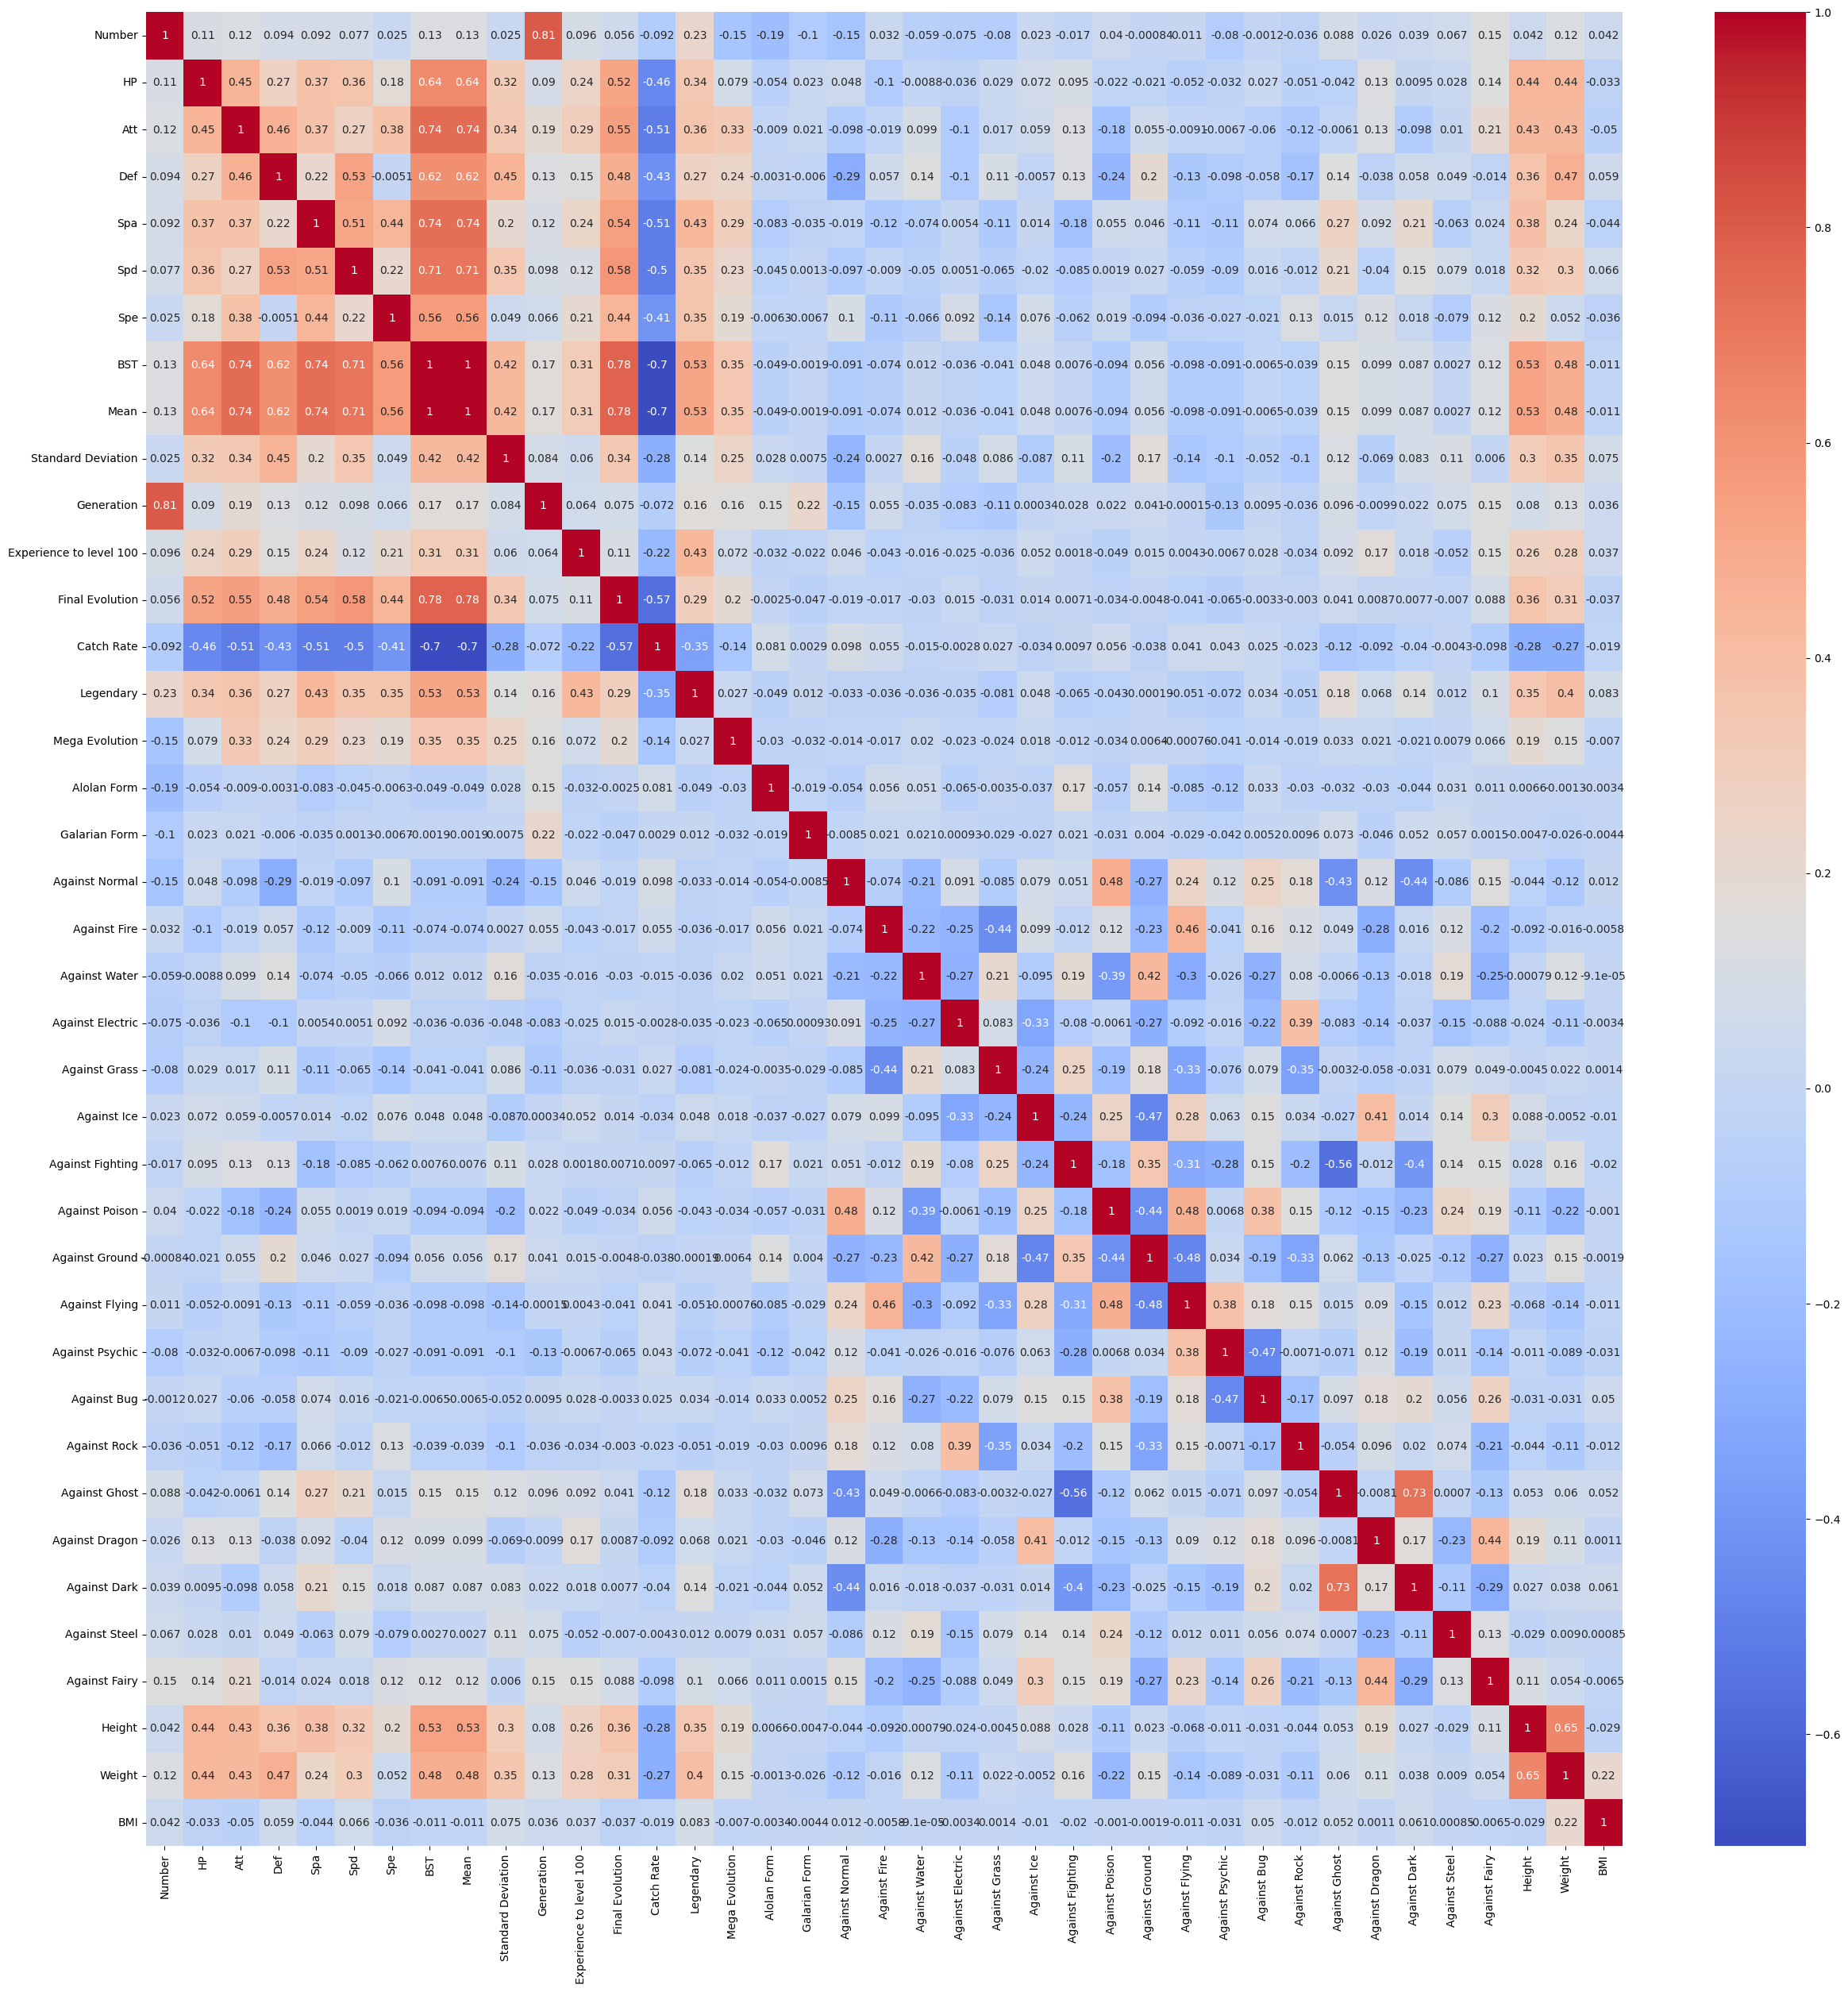

In [11]:
plt.figure(figsize=[30,30])
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

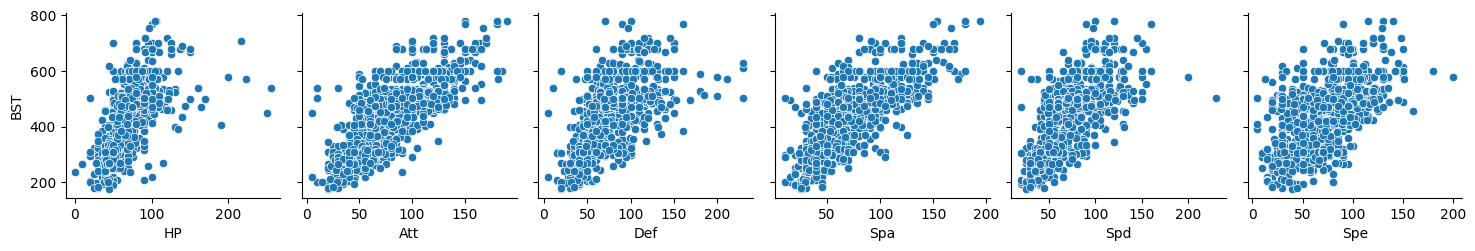

In [12]:
sns.pairplot(df, x_vars= ["HP","Att", "Def", "Spa", "Spd", "Spe"], y_vars=["BST"])

In [13]:
reg = LinearRegression().fit(np.array(df[["HP","Att","Def","Spa","Spd","Spe"]]), np.array(df["BST"]))
reg.coef_

array([1., 1., 1., 1., 1., 1.])

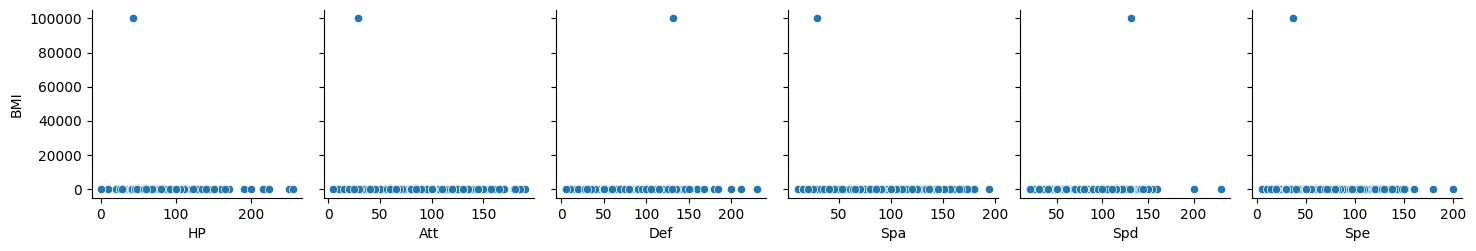

In [14]:
sns.pairplot(df, x_vars= ["HP","Att", "Def", "Spa", "Spd", "Spe"], y_vars=["BMI"])

In [15]:
df[df["BMI"] == df["BMI"].max()]

,Number,Name,Type 1,Type 2,Ability1,Ability2,Ability3,HP,Att,Def,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
914,790,Cosmoem,Psychic,NaN,Sturdy,NaN,NaN,43,29,131,...,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.1,999.9,99990.0


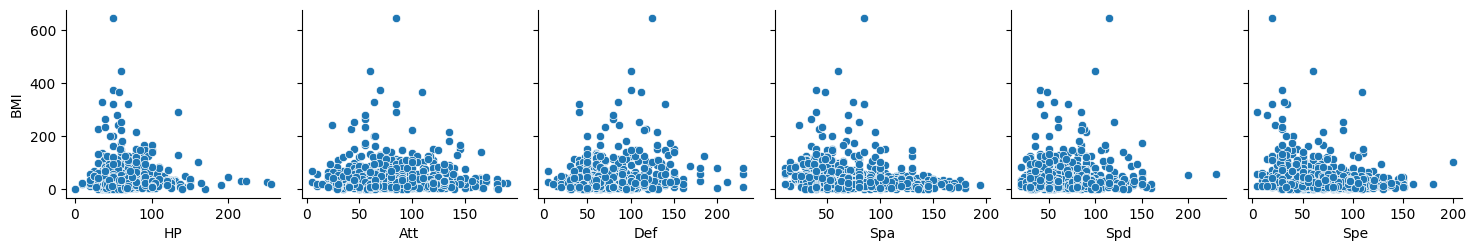

In [16]:
sns.pairplot(df.drop([914]), x_vars= ["HP","Att", "Def", "Spa", "Spd", "Spe"], y_vars=["BMI"])

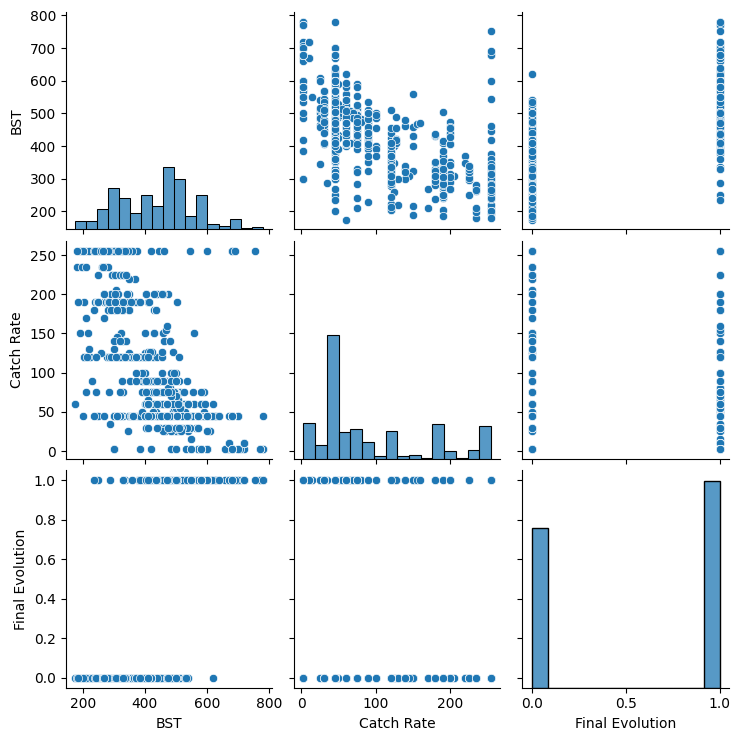

In [17]:
df.drop(columns=["HP","Att", "Def", "Spa", "Spd", "Spe"], axis=1, inplace=True)
sns.pairplot(df, x_vars=["BST","Catch Rate", "Final Evolution"], y_vars=["BST","Catch Rate", "Final Evolution"])

In [18]:
if sorted(df["Type 1"].dropna().unique()) == sorted(df["Type 1"].dropna().unique()):
    print("True")

True


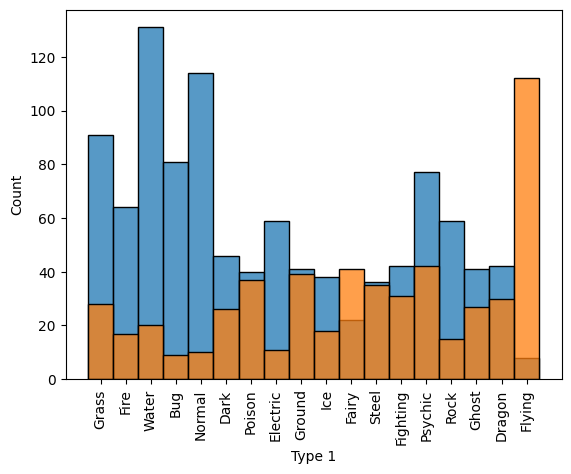

In [19]:
sns.histplot(df["Type 1"])
sns.histplot(df["Type 2"].dropna())
plt.xticks(rotation = 90)
plt.show()

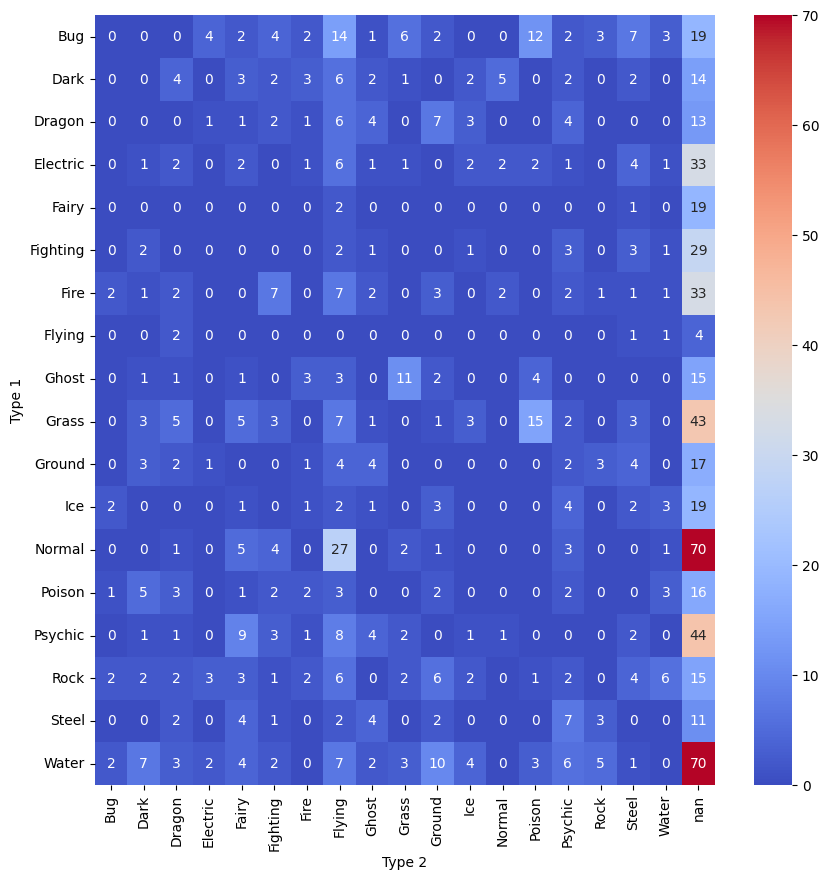

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.crosstab(df["Type 1"], df["Type 2"], dropna=False), cmap="coolwarm", annot=True)
plt.show()

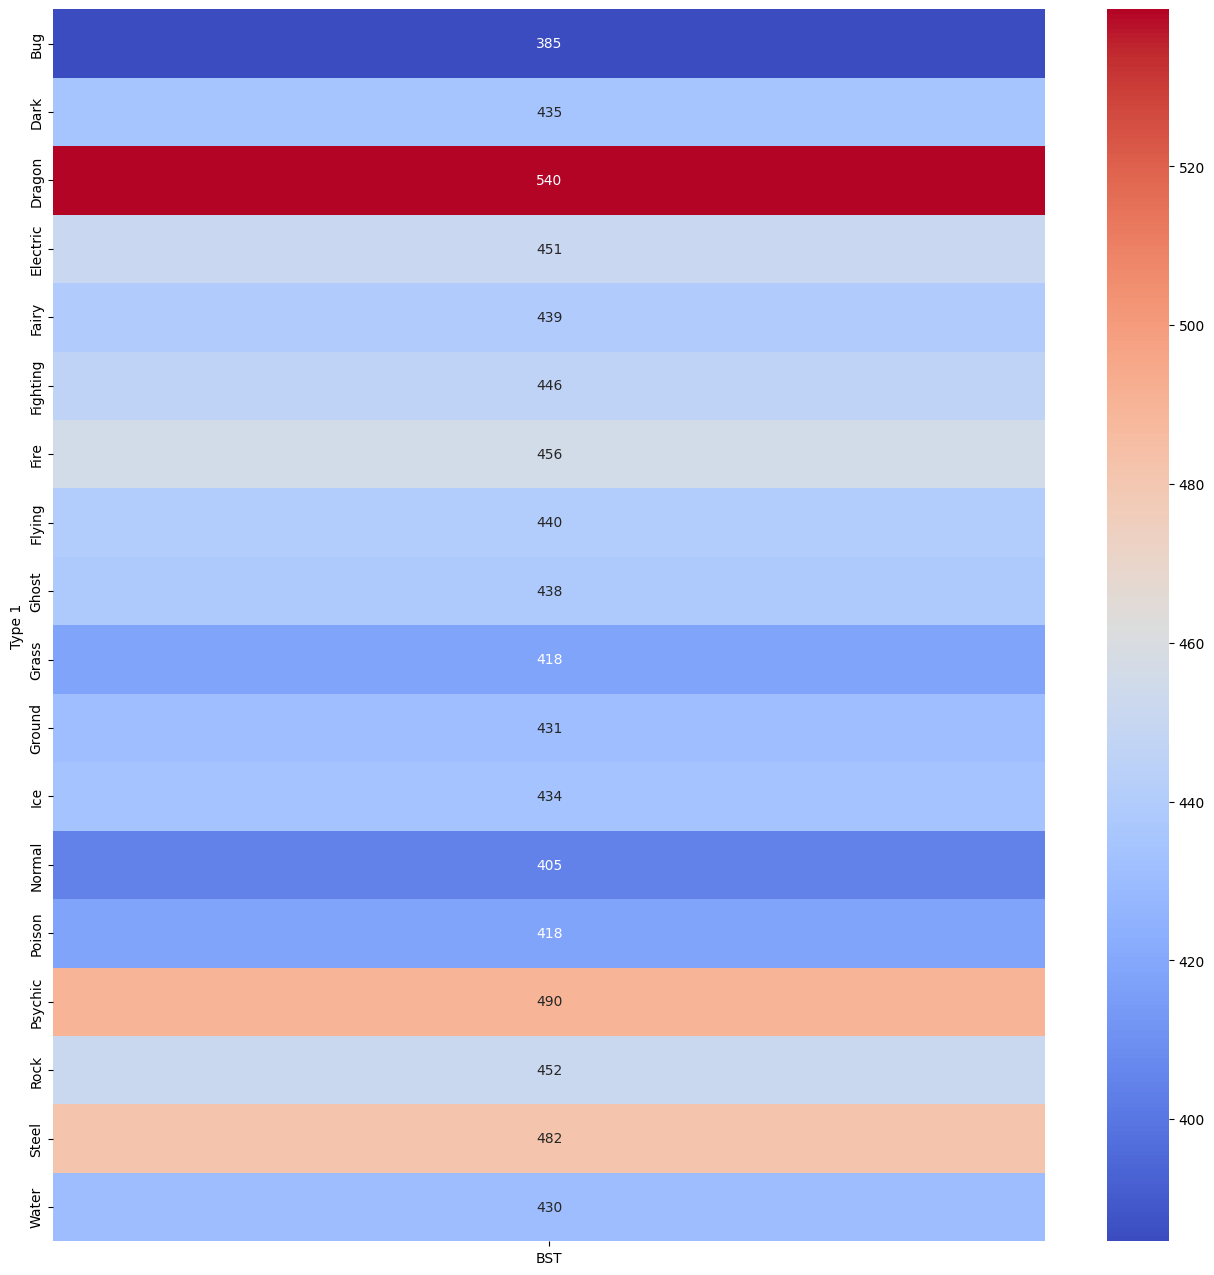

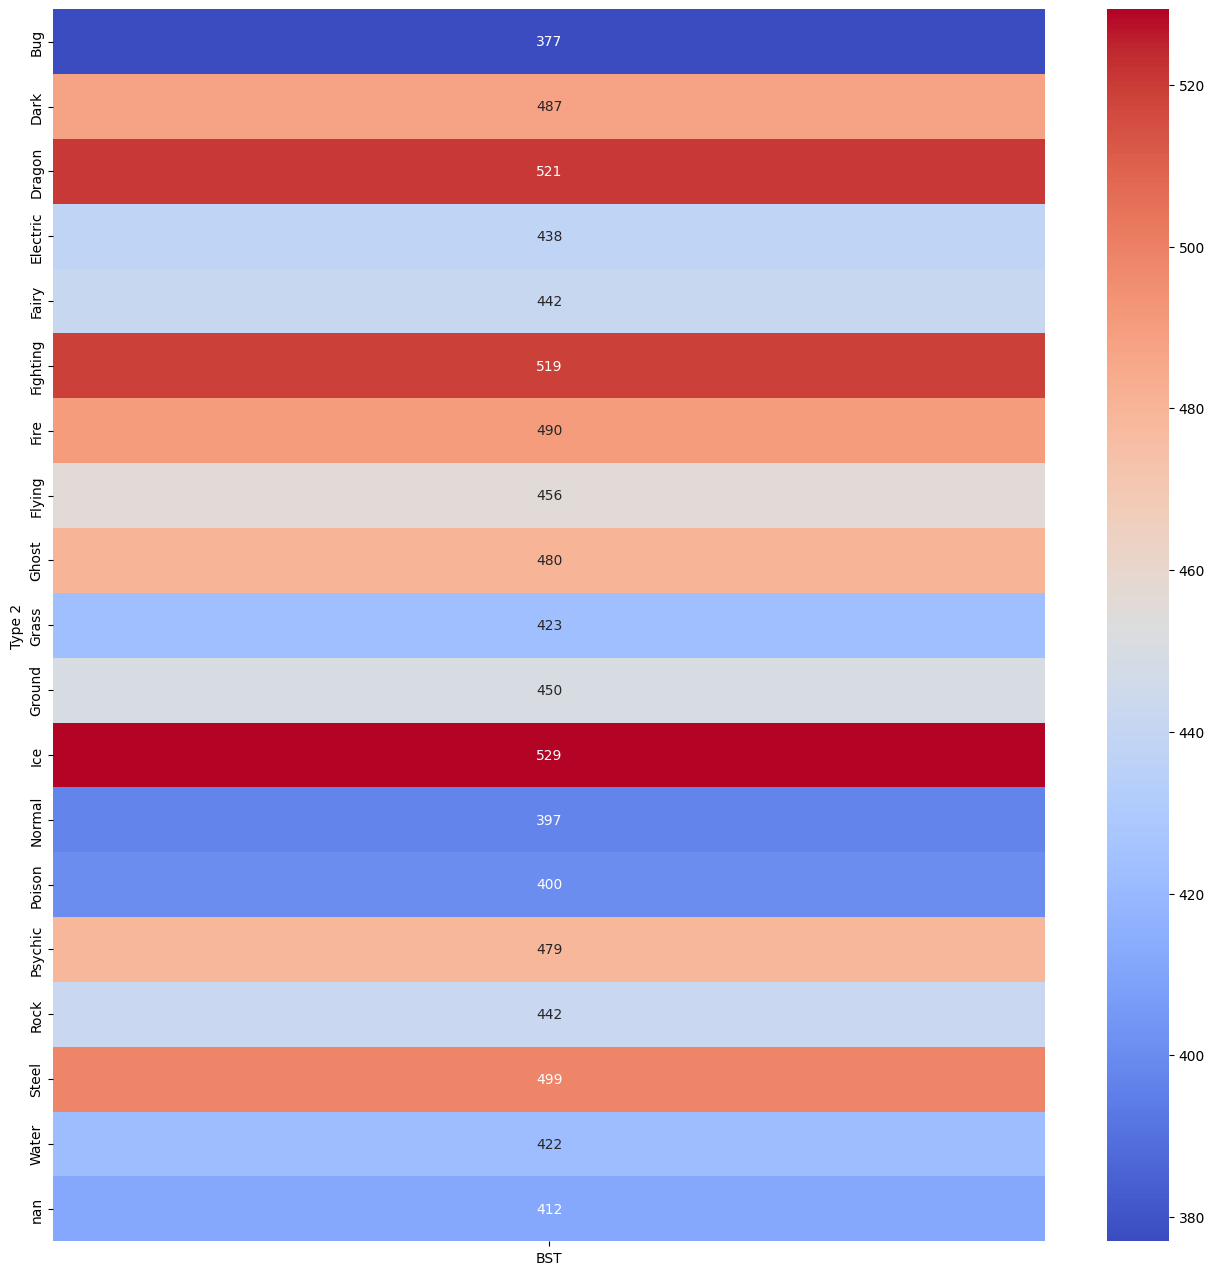

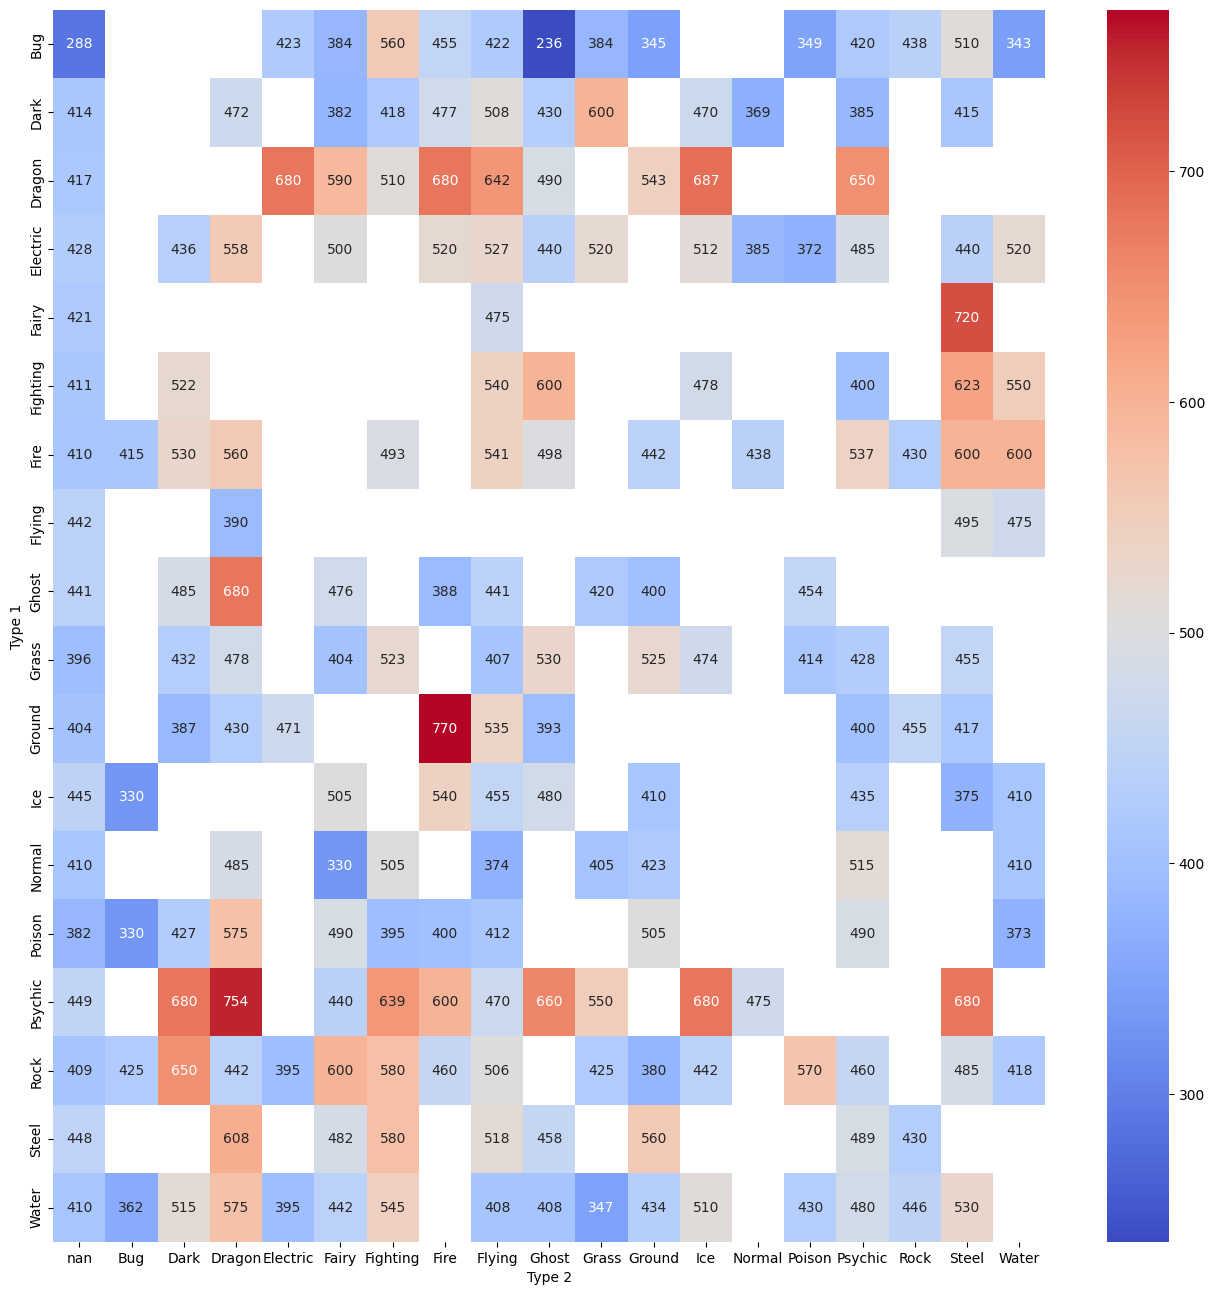

In [21]:
plt.figure(figsize=(16,16))
sns.heatmap(df.pivot_table(values=["BST"], index=["Type 1"], dropna=False), annot=True, cmap="coolwarm", fmt=".0f")
plt.show()
plt.figure(figsize=(16,16))
sns.heatmap(df.pivot_table(values=["BST"], index=["Type 2"], dropna=False), annot=True, cmap="coolwarm", fmt=".0f")
plt.show()
plt.figure(figsize=(16,16))
sns.heatmap(df.pivot_table(values=["BST"], index=["Type 1","Type 2"], dropna=False).unstack(fill_value=0)["BST"], annot=True, cmap="coolwarm", fmt=".0f")
plt.show()

In [22]:
df.columns

Index(['Number', 'Name', 'Type 1', 'Type 2', 'Ability1', 'Ability2',
       'Ability3', 'BST', 'Mean', 'Standard Deviation', 'Generation',
       'Experience type', 'Experience to level 100', 'Final Evolution',
       'Catch Rate', 'Legendary', 'Mega Evolution', 'Alolan Form',
       'Galarian Form', 'Against Normal', 'Against Fire', 'Against Water',
       'Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting',
       'Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic',
       'Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon',
       'Against Dark', 'Against Steel', 'Against Fairy', 'Height', 'Weight',
       'BMI'],
      dtype='object')

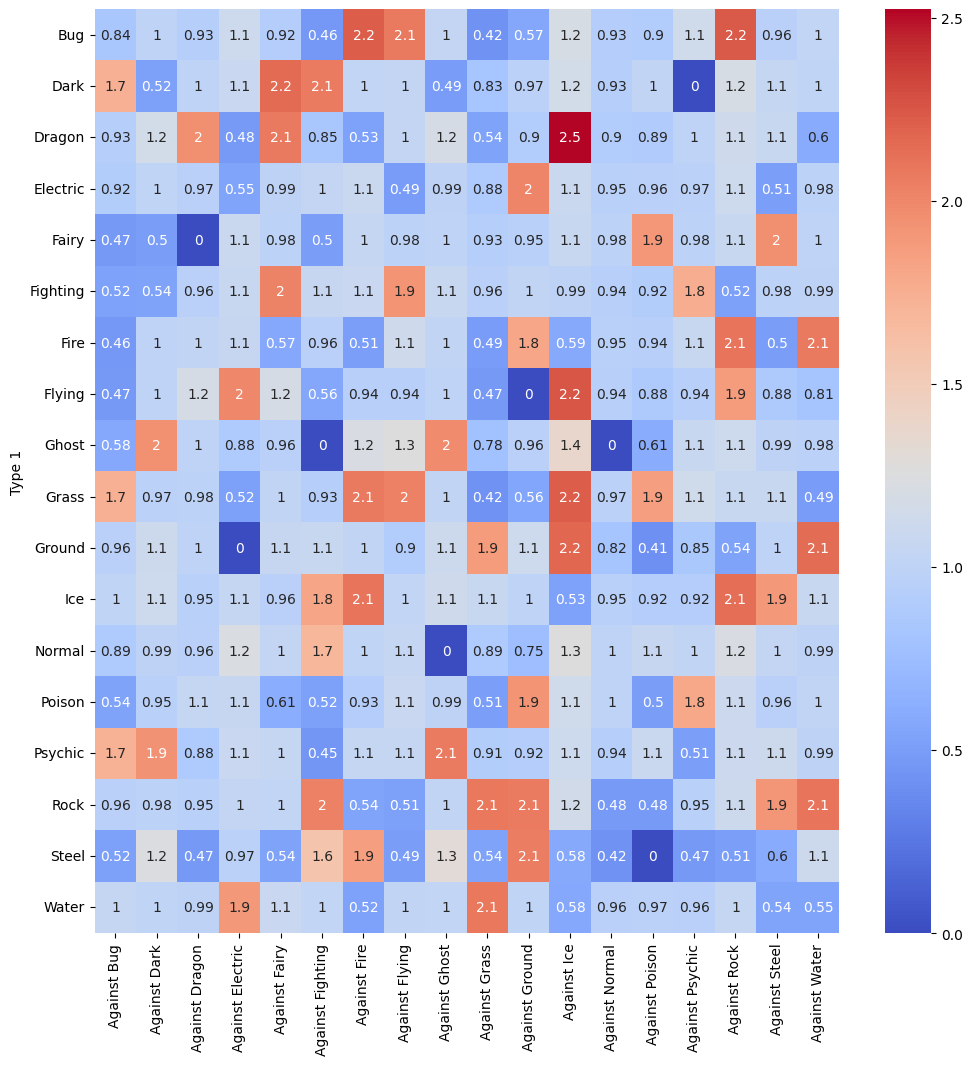

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(df.pivot_table(index=["Type 1"], values=['Against Normal', 'Against Fire', 'Against Water','Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting','Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic','Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon', 'Against Dark', 'Against Steel', 'Against Fairy']), annot=True, cmap="coolwarm")
plt.show()

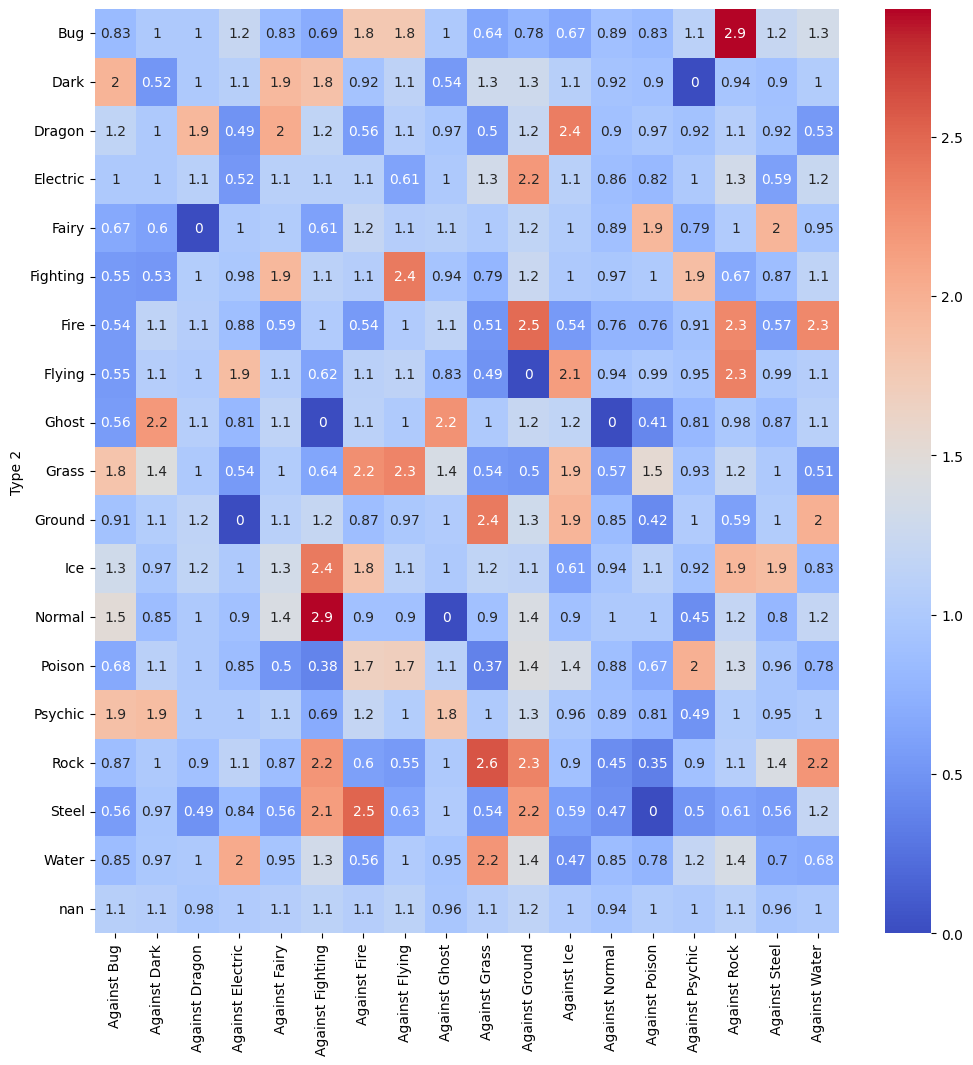

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(df.pivot_table(index=["Type 2"], dropna=False , values=['Against Normal', 'Against Fire', 'Against Water','Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting','Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic','Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon', 'Against Dark', 'Against Steel', 'Against Fairy']), annot=True, cmap="coolwarm")
plt.show()

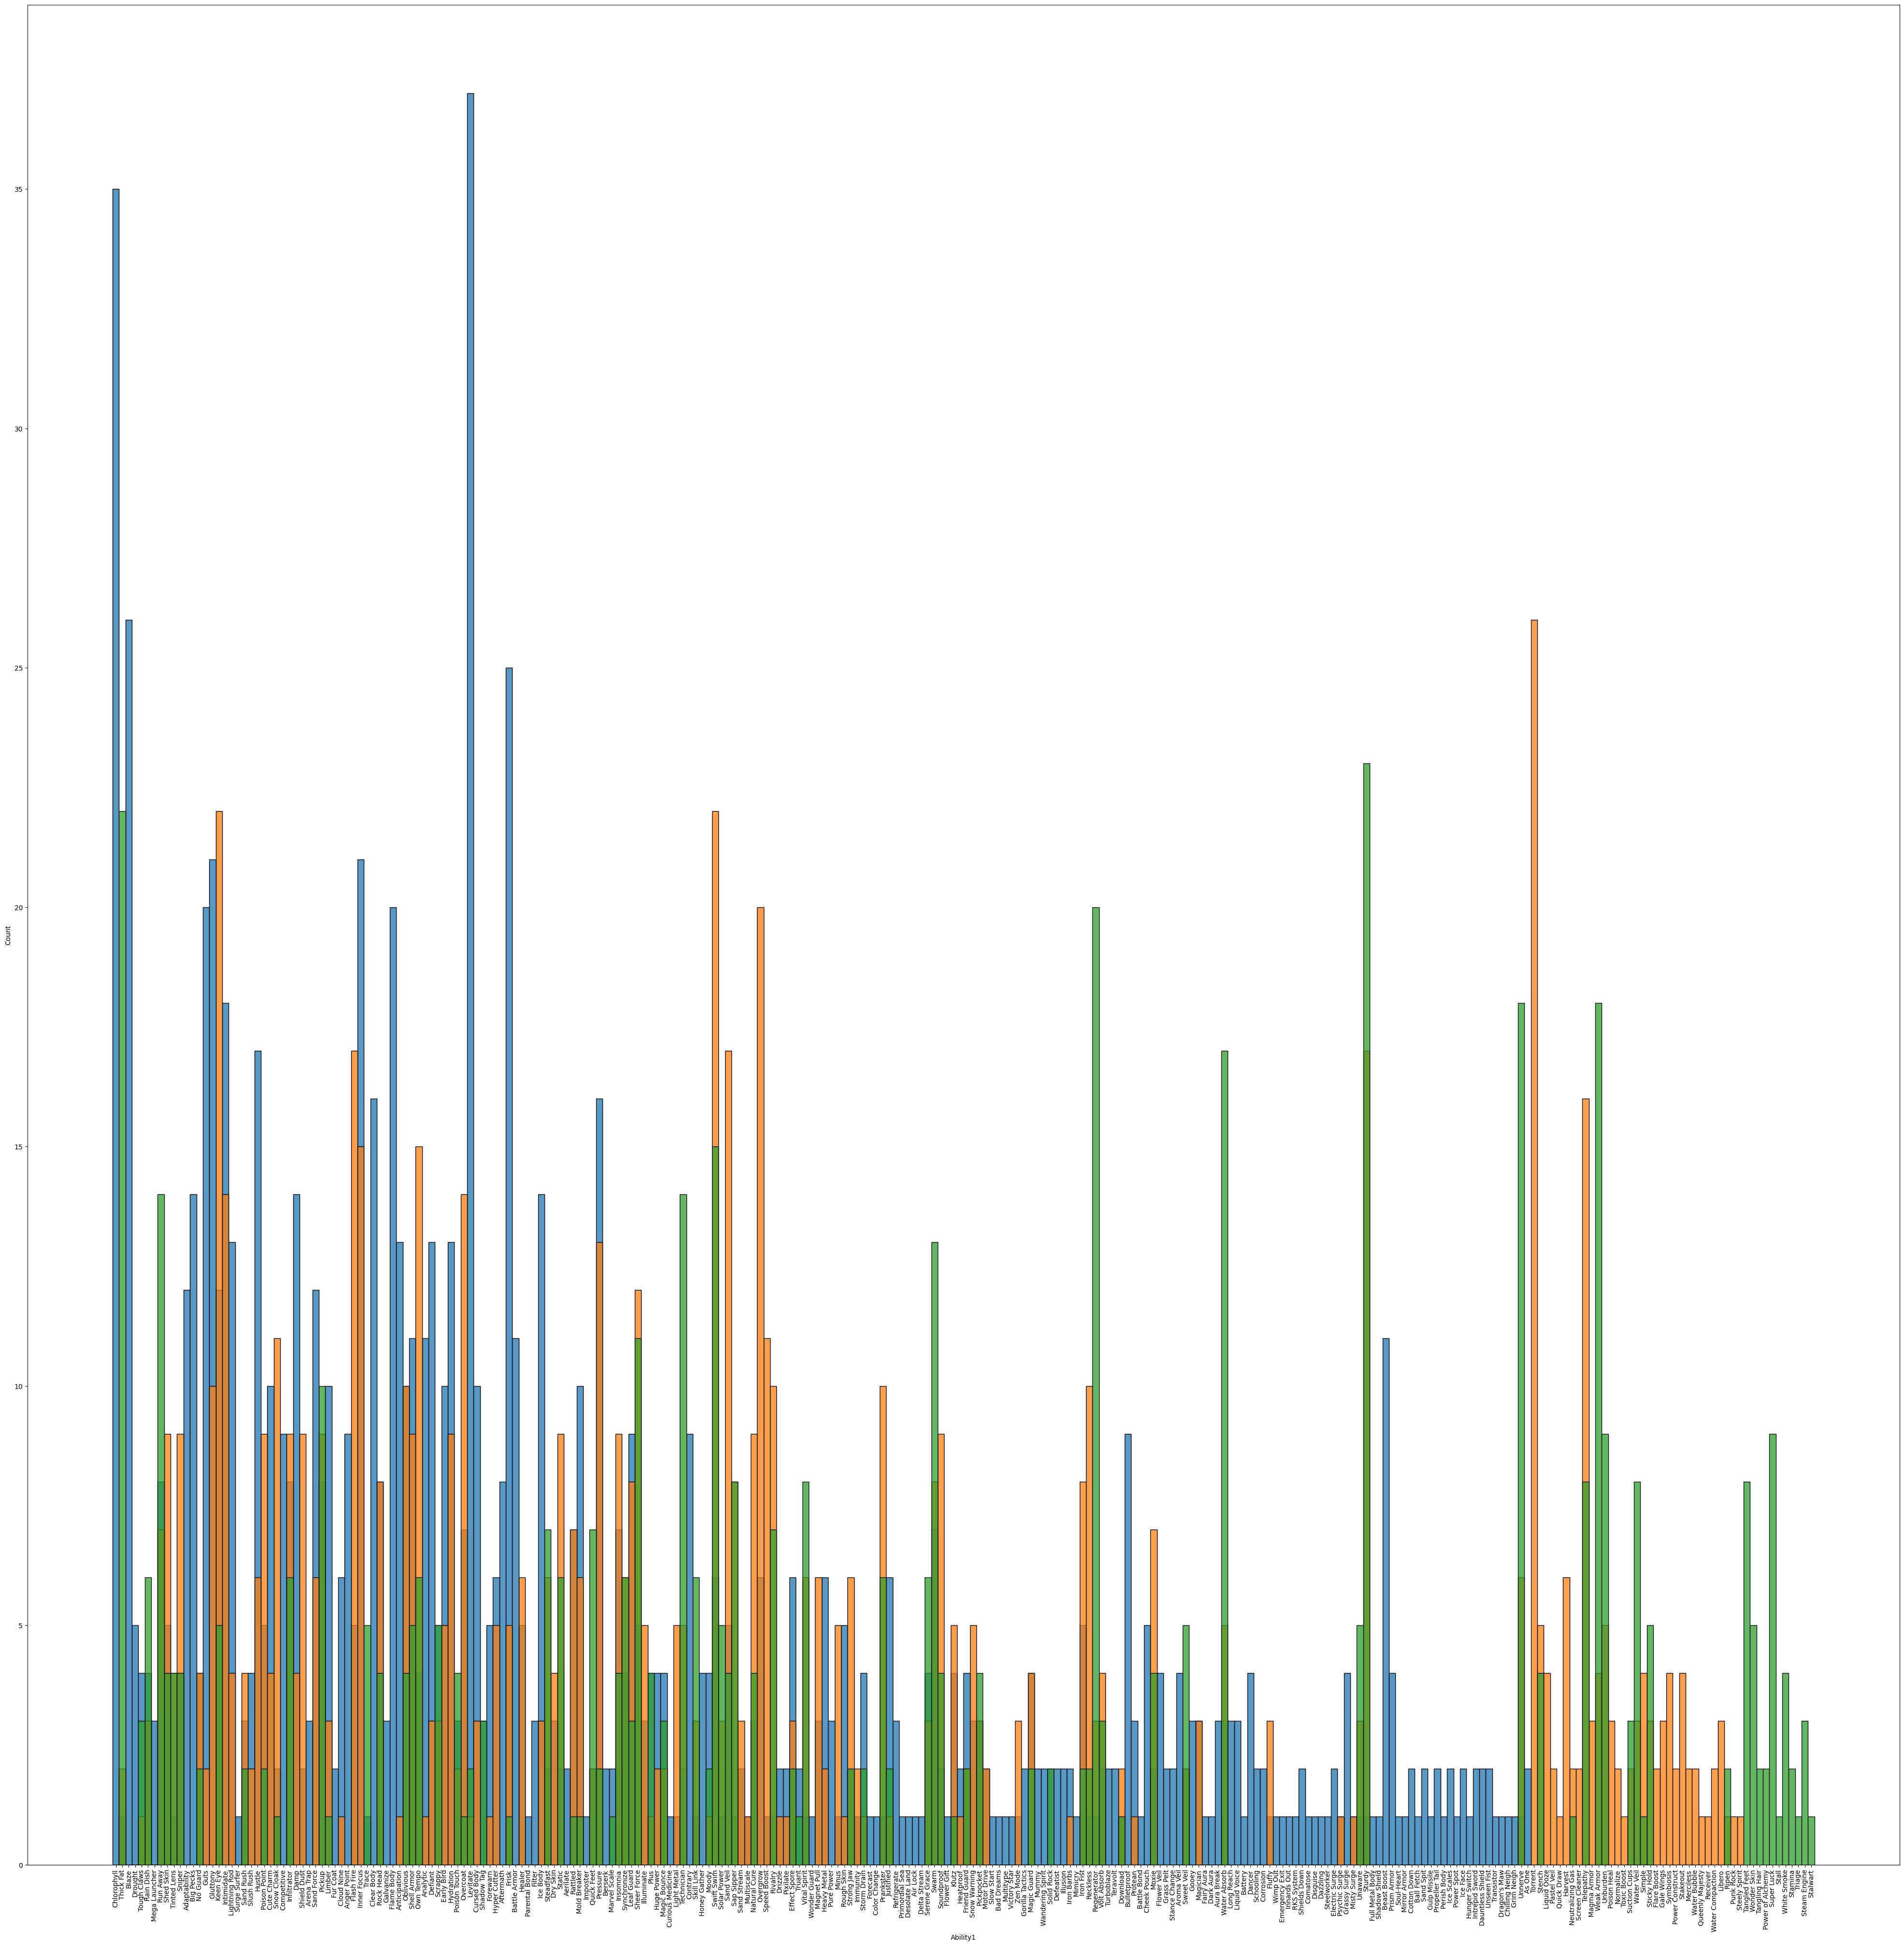

In [25]:
plt.figure(figsize=(50,50))
sns.histplot(df["Ability1"])
sns.histplot(df["Ability2"])
sns.histplot(df["Ability3"])
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

In [26]:
print(df["Mega Evolution"].unique())
print(df["Galarian Form"].unique())
print(df["Alolan Form"].unique())

[0. 1.]
[0. 1.]
[0. 1.]


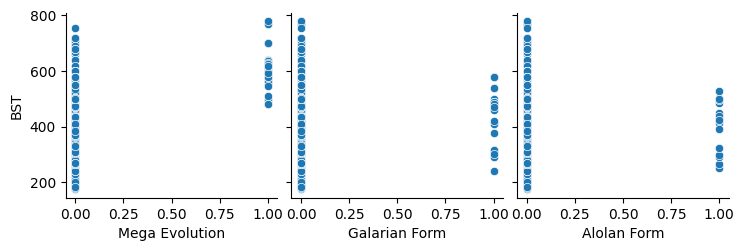

In [27]:
sns.pairplot(df, x_vars=["Mega Evolution","Galarian Form", "Alolan Form"], y_vars=["BST"])
plt.show()

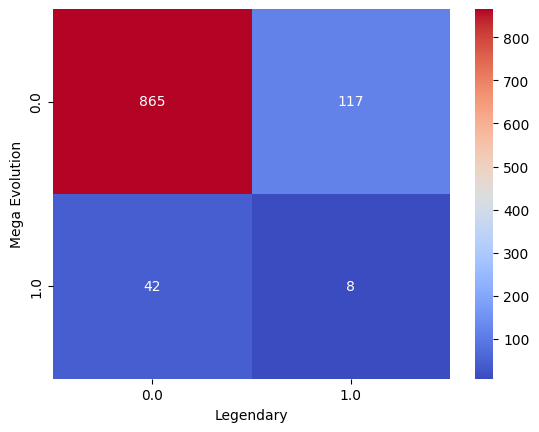

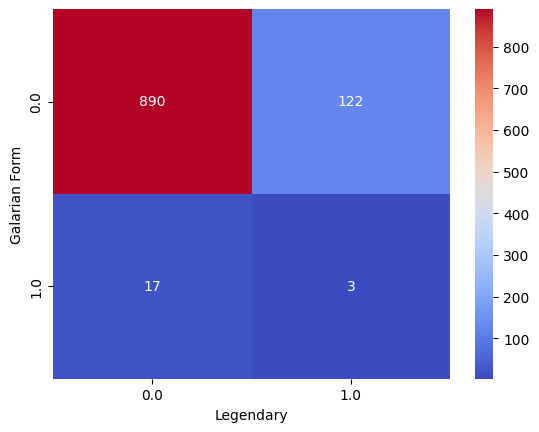

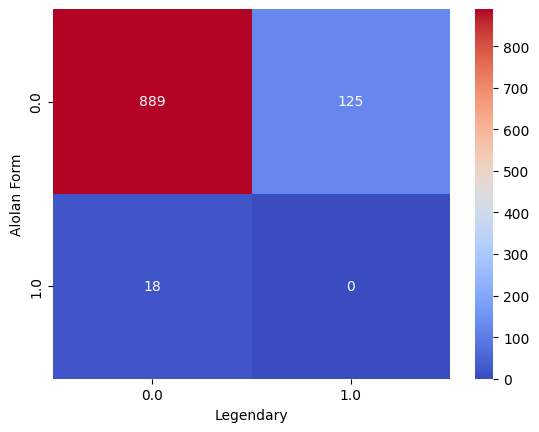

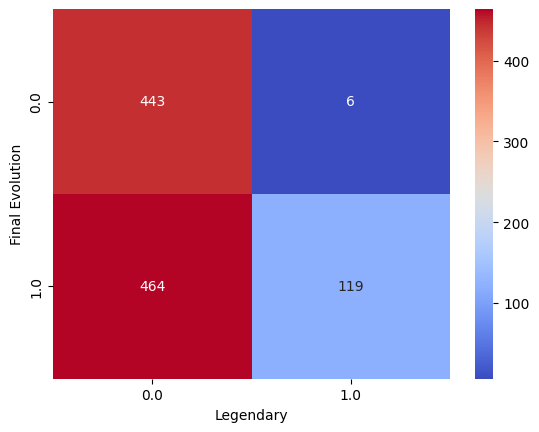

In [28]:
sns.heatmap(pd.crosstab(df["Mega Evolution"], df["Legendary"]), cmap="coolwarm", annot=True, fmt=".0f")
plt.show()
sns.heatmap(pd.crosstab(df["Galarian Form"], df["Legendary"]), cmap="coolwarm", annot=True, fmt=".0f")
plt.show()
sns.heatmap(pd.crosstab(df["Alolan Form"], df["Legendary"]), cmap="coolwarm", annot=True, fmt=".0f")
plt.show()
sns.heatmap(pd.crosstab(df["Final Evolution"], df["Legendary"]), cmap="coolwarm", annot=True, fmt=".0f")
plt.show()

<Axes: ylabel='Legendary'>

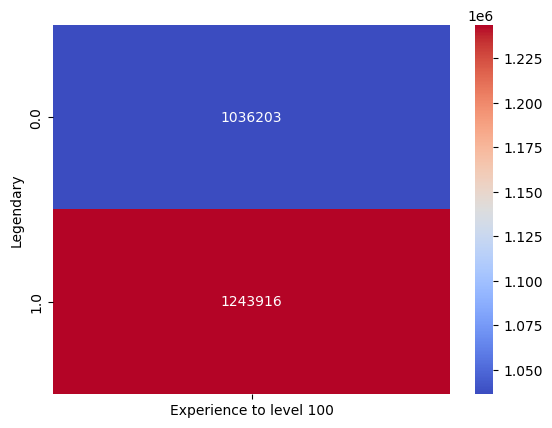

In [29]:
sns.heatmap(df.pivot_table(values=["Experience to level 100"], index=["Legendary"]), cmap="coolwarm", annot=True, fmt=".0f")

<Axes: ylabel='Experience type'>

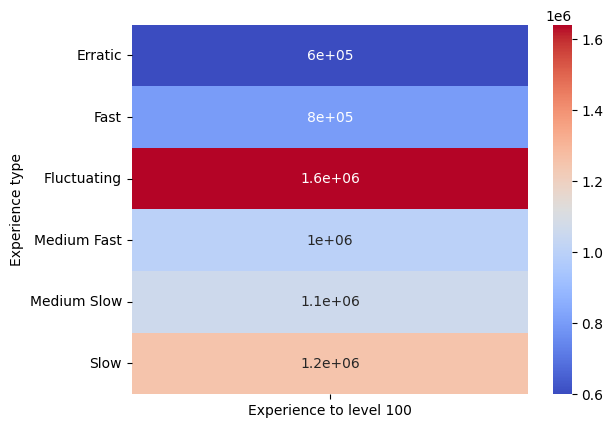

In [30]:
sns.heatmap(df.pivot_table(values=["Experience to level 100"], index=["Experience type"], aggfunc="mean"), cmap="coolwarm", annot=True)

In [31]:
df["Experience type"] = df["Experience type"].replace({"Erratic":1, "Fast":2, "Medium Fast":3, "Medium Slow":4, "Slow":5, "Fluctuating":6}, inplace=True)

In [32]:
num1 = 1
for i in df.pivot_table(values=["BST"], index=["Type 1"]).sort_values(by=["BST"]).index:
    df["Type 1"].replace({i:num1}, inplace=True)
    num1 = num1 + 1

num2 = 1
for i in df.pivot_table(values=["BST"], index=["Type 2"]).sort_values(by=["BST"]).index:
    df["Type 2"].replace({i:num2}, inplace=True)
    num2 = num2 + 1

df["Type 2"].fillna(0, inplace=True)

In [33]:
num3 = 1
for i in df.pivot_table(values=["BST"], index=["Ability1"]).sort_values(by=["BST"]).index:
    df["Ability1"].replace({i:num3}, inplace=True)
    num3 = num3 + 1

num4 = 1
for i in df.pivot_table(values=["BST"], index=["Ability2"]).sort_values(by=["BST"]).index:
    df["Ability2"].replace({i:num4}, inplace=True)
    num4 = num4 + 1

num5 = 1
for i in df.pivot_table(values=["BST"], index=["Ability3"]).sort_values(by=["BST"]).index:
    df["Ability3"].replace({i:num5}, inplace=True)
    num5 = num5 + 1

df["Ability2"].fillna(0, inplace=True)

df["Ability3"].fillna(0, inplace=True)

In [34]:
df.select_dtypes(exclude="object").var()

Number                     6.857660e+04
Type 1                     3.158685e+01
Type 2                     3.549827e+01
Ability1                   2.935782e+03
Ability2                   1.910800e+03
Ability3                   8.396346e+02
BST                        1.456259e+04
Mean                       4.045163e+02
Standard Deviation         1.172954e+02
Generation                 5.124396e+00
Experience to level 100    2.467652e+10
Final Evolution            2.460235e-01
Catch Rate                 5.824143e+03
Legendary                  1.065563e-01
Mega Evolution             4.614696e-02
Alolan Form                1.715426e-02
Galarian Form              1.902270e-02
Against Normal             8.299399e-02
Against Fire               4.952701e-01
Against Water              3.691183e-01
Against Electric           4.038789e-01
Against Grass              5.604657e-01
Against Ice                5.771857e-01
Against Fighting           5.749320e-01
Against Poison             2.969571e-01


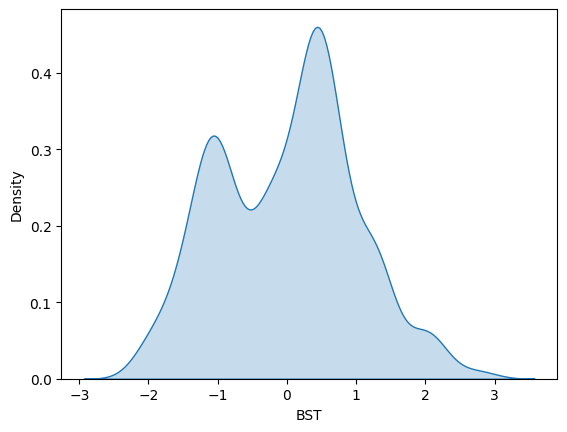

In [55]:
sns.kdeplot((df["BST"] - df["BST"].mean(axis=0))/df["BST"].std(axis=0), fill = True)
plt.show()

In [60]:
mean = df["BST"].mean(axis=0)
std = df["BST"].std(axis=0)

outlier_detection_data = df
outlier_detection_data["BST"] = (outlier_detection_data["BST"] - outlier_detection_data["BST"].mean(axis=0)) / outlier_detection_data["BST"].std(axis=0)

outliers = outlier_detection_data[(outlier_detection_data["BST"] < (mean - 2*std)) & (outlier_detection_data["BST"] > (mean + 2*std))]

outliers

,Number,Name,Type 1,Type 2,Ability1,Ability2,Ability3,BST,Mean,Standard Deviation,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
